# Neo4j - GraphViz 可視化サンプル


*Mitsutoshi Kiuchi <m-kiuchi@creationline.com>*

Prerequisite:

```shell
# pip install neo4j-driver
# pip install graphviz
```

---

ドライバの読み込み

In [23]:
from neo4j.v1 import GraphDatabase, basic_auth
from graphviz import Graph

クエリを定義

In [24]:
queryStr = "MATCH (a)-[r]-(b) WHERE a.name = 'Tom Hanks' RETURN a,r,b"

Neo4jドライバを初期化し、接続

In [25]:
driver = GraphDatabase.driver("bolt://localhost:7687", auth=basic_auth("neo4j", "1234"))
session = driver.session()

クエリを実行

In [52]:
with session.begin_transaction() as tx:
    results = tx.run(queryStr)
    tx.success = True

結果を取得してグラフデータを作成

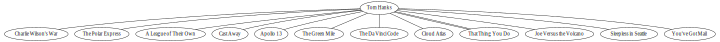

In [53]:
h = Graph('cypherquery', format='svg', graph_attr={"size":"10,20"})
for result in results:
    #print(result["a"].properties["name"], result["b"].properties)
    h.edge(result["a"].properties["name"], result["b"].properties["title"])
h